## EOM

$\frac{d}{dt}\phi_i=p_i$

$\frac{d}{dt}p_i=\beta\sum_{n=1}^{5}(x_i)^i\frac{f_n-\phi_0-\phi_1x_n-\phi_2x_n^2}{\delta f_n^2}$

In [1]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
from  math import *
import matplotlib.pyplot as plt
import scipy.optimize as so
import scipy.special as sp
import mpmath as mp



N_md = 10#Leapfrog integration steps
N_cfg = 100000
beta=1000
phi=np.array((800,800,600))
ar=0
f_i=np.array((0.96,1.025,1.055,1.085,1.13))*1000
x=np.array((0.176,0.234,0.260,0.284,0.324))
delta_f=np.array((0.025,0.02,0.015,0.01,0.008))*1000

This is just defining of variables and putting in the data.

In [2]:
def leapfrog_plot():
    global N_md
    p=np.zeros(3)
    phi=np.array((00,00,00))
    for i in range(100):
        for j in range(3):
            p[j]=np.random.normal(loc=00.0, scale=1.0) 
        H_0=H(p,phi)
        N_md=i*10+10
        p_new,phi_new=leapfrog(p,phi)
        plt.plot(i*10+10,abs((H(p_new,phi_new)-H_0)/H_0), 'x', color='b')
        #print(p,phi)
    plt.semilogy()    
    plt.show() 

checking the leapfrog convergency by plotting the relative change $H$ in  before and after the leapfrog step for different $N_{md}$

In [3]:
def leapfrog(p,phi_l):
    # p_0_1,p_0_2,p_0_3,
    global beta 
    global f
    global x
    global J
    global N 
    global h
    global N_md
    
    eps=1/N_md
    phi_l=phi_l+eps/2*p
 
    for i in range(N_md-1):
        #print(np.sum(x**2*(f_i-phi[0]-phi[1]*x-phi[2]*x**2)/delta_f**2))
        
        p[0]=p[0]+eps*(beta*np.sum((f_i-phi_l[0]-phi_l[1]*x-phi_l[2]*x**2)/delta_f**2))
        p[1]=p[1]+eps*(beta*np.sum(x*((f_i-phi_l[0]-phi_l[1]*x-phi_l[2]*x**2)/delta_f**2)))
        p[2]=p[2]+eps*(beta*np.sum(x**2*(f_i-phi_l[0]-phi_l[1]*x-phi_l[2]*x**2)/delta_f**2))
        phi_l=phi_l+eps*p
        #print(p)
    p[0]=p[0]+eps*(beta*np.sum((f_i-phi_l[0]-phi_l[1]*x-phi_l[2]*x**2)/delta_f**2))
    p[1]=p[1]+eps*(beta*np.sum(x*(f_i-phi_l[0]-phi_l[1]*x-phi_l[2]*x**2)/delta_f**2))
    p[2]=p[2]+eps*(beta*np.sum(x**2*(f_i-phi_l[0]-phi_l[1]*x-phi_l[2]*x**2)/delta_f**2))
    phi_l=phi_l+eps/2*p
    #print(p)
    return p,phi_l

input: $p$, $phi$; output: $p$, $phi$ Normal leapfrog as last time. $\tau=1$, but changeable. We do the calculations in arrays and then take the sum, which represents the sums from theory.

In [4]:
def H(p,phi_h):
    global beta 
    global J 
    global h 
    global f
    global x
    global delta_f
    
    return  np.sum(p**2)/2+beta*0.5*np.sum((f_i-(phi_h[0]+x*phi_h[1]+x**2*phi_h[2]))**2/delta_f**2)

input $p,\phi$: ; output: $H(p,\phi)$

In [6]:
def HMC():
    global N_md
    global p_0
    global phi
    #global p
    global ar
    
    p=np.zeros(3)
    for j in range(3):
        p[j]=np.random.normal(loc=00.0, scale=1.0)
    p_l,phi_l = leapfrog(p,phi)    
    
    
    P_acc = np.exp(float(H(p,phi)-H(p_l,phi_l)))
    
        
    if P_acc > np.random.rand(): 
        
        phi = phi_l
        ar=ar+1

Classical HMC-Algo, which returns the next element of the markov chain. There is no real return, but the $\phi$ is saved as a global variable. Candidates are created with the leapfrog-algo. In our case it also keeps track of the acceptance probability with ar.

In [7]:
def markov_chain():
    global N_cfg
    global x
    global phi
    
    
    phi_chain=[]
    for i in range(N_cfg):
        HMC()
        phi_chain.append(phi)
        #print(ar/(i+1))
    print(ar/(N_cfg))
    phi_chain=np.transpose(phi_chain)
    plt.plot(phi_chain[0], label='$\phi_0$')
    plt.plot(phi_chain[1], label='$\phi_1$')
    plt.plot(phi_chain[2], label='$\phi_2$')
    plt.legend()
    plt.show()
    phi_0=np.average(phi_chain[0])
    phi_1=np.average(phi_chain[1])
    phi_2=np.average(phi_chain[2])
    sigma_0=np.sqrt(np.average((phi_chain[0]-phi_0)**2))
    sigma_1=np.sqrt(np.average((phi_chain[1]-phi_1)**2))
    sigma_2=np.sqrt(np.average((phi_chain[2]-phi_2)**2))
    print(phi_0,phi_1,phi_2,sigma_0,sigma_1,sigma_2) 
    x=np.append(x,.134977)
    plt.plot(x,phi_0+phi_1*x+phi_2*x**2)
    plt.plot(.134977,939.5,'x', color='r')
    plt.show()
    


This creates the marcov chain (phi_chain). It also does calculate all s and s for our chain and plots the result as well as the real world solution

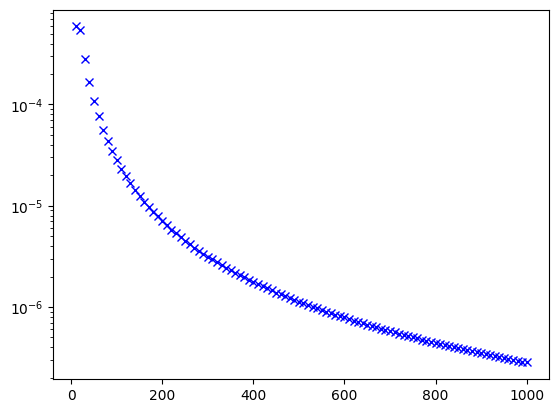

In [8]:
leapfrog_plot()

leapgrog convergency looks very good.

0.94088


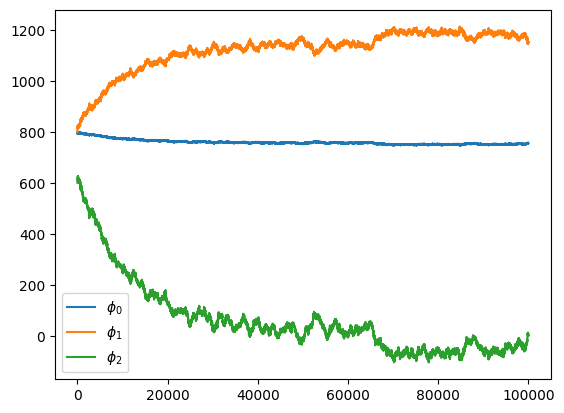

760.1158190549872 1121.7178617860322 63.892933990497646 10.027067003062253 77.55243748078905 144.84182192652253


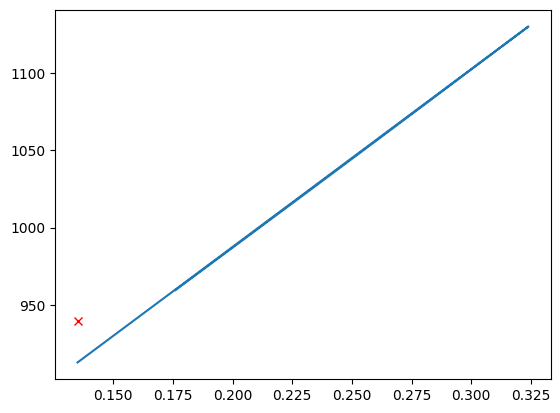

In [9]:
N_md=10
markov_chain()

This is where things start to get strange. Even though our leapfrog convergency is great our values for $\phi_1$ and $\phi_2$ do not converge to the expected values (800,600). I actually checked everything (model data, theoretical calculations, implementation...) several times and cant find a mistake there. My last guess would be that the calculations in the leapfrog do not work as i expect them to do, but I tested how the multiplication for arrays work in python and it should work as I implemented it. I definetly understood the theory and the idea behind the sheet and spend way too much time finding the error already. So ill stop here and hand in what we got. We calculated all the nessecary data from our chain, but its hard to interpret the results knowing that they are wrong. By the way, I dont know why the code is so slow in Jupyter, when i put it in spyder its a lot faster...